In [114]:
# Solution set for CS 155 Set 6, 2016/2017
# Authors: Fabian Boemer, Sid Murching, Suraj Nair

import numpy as np
import random
import math

def grad_U(Ui, Yij, Vj, reg, eta):
    """
    Takes as input Ui (the ith row of U), a training point Yij, the column
    vector Vj (jth column of V^T), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Ui multiplied by eta.
    """

    left = np.multiply(reg, Ui)
    right = np.dot(Ui, Vj)
    right2 = Vj * (Yij - right)
    return (left - right2) * eta
      

def grad_V(Vj, Yij, Ui, reg, eta):
    """
    Takes as input the column vector Vj (jth column of V^T), a training point Yij,
    Ui (the ith row of U), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Vj multiplied by eta.
    """
    left = np.multiply(reg, Vj)
    right = np.dot(Ui, Vj)
    right2 = Ui * (Yij - right)
    return (left - right2) * eta

def get_err(U, V, Y, reg):
    """
    Takes as input a matrix Y of triples (i, j, Y_ij) where i is the index of a user,
    j is the index of a movie, and Y_ij is user i's rating of movie j and
    user/movie matrices U and V.

    Returns the mean regularized squared-error of predictions made by
    estimating Y_{ij} as the dot product of the ith row of U and the jth column of V^T.
    """

    error = 0

    for i in Y:
        error += (i[2] - np.dot(U[i[0] - 1], V[i[1] - 1])) ** 2

    left = (reg / 2) * (np.linalg.norm(U) ** 2 + np.linalg.norm(V) ** 2)

    return (left + error/2)/len(Y)


def train_model(M, N, K, eta, reg, Y, eps=0.0001, max_epochs=300):
    """
    Given a training data matrix Y containing rows (i, j, Y_ij)
    where Y_ij is user i's rating on movie j, learns an
    M x K matrix U and N x K matrix V such that rating Y_ij is approximated
    by (UV^T)_ij.

    Uses a learning rate of <eta> and regularization of <reg>. Stops after
    <max_epochs> epochs, or once the magnitude of the decrease in regularized
    MSE between epochs is smaller than a fraction <eps> of the decrease in
    MSE after the first epoch.

    Returns a tuple (U, V, err) consisting of U, V, and the unregularized MSE
    of the model.
    """
    U = np.random.rand(M, K) - (np.ones((M, K))/2)
    V = np.random.rand(N, K) - (np.ones((N, K))/2)
    
    loss = []
    
    for iters in range(max_epochs):
        print("iter")
        np.random.shuffle(Y)
        
        for i, j, y in Y:
            U_row = U[i - 1]
            V_row = V[j - 1]
            U_grad = grad_U(U_row, y, V_row, reg, eta)
            V_grad = grad_V(V_row, y, U_row, reg, eta)
            U[i - 1] -= U_grad
            V[j - 1] -= V_grad
        
        loss.append(get_err(U, V, Y, 0.0))
        print(loss[-1])
        
        if iters == 0:
            continue
        elif (loss[-2] - loss[-1])/(loss[0] - loss[1]) <= eps:
            print("should break")
            break
        else:
            print("else")
            
    return U, V, loss[-1]


Factorizing with  943  users,  1682  movies.
iter
0.5702735607767937
iter
0.434907693557762
else
iter
0.39058689429131244
else
iter
0.3628431868381382
else
iter
0.3419873114675084
else
iter
0.3242370911175616
else
iter
0.31187047548905333
else
iter
0.3006253615241062
else
iter
0.29706726725898125
else
iter
0.2891124994460272
else
iter
0.28275431743339524
else
iter
0.276842287253196
else
iter
0.27413922391732337
else
iter
0.2714324550232842
else
iter
0.2674470985527561
else
iter
0.26319026639578624
else
iter
0.26105045441468927
else
iter
0.2611491031300669
should break
iter
0.533442119085081
iter
0.3966354931938374
else
iter
0.34337967666328384
else
iter
0.29974842621751735
else
iter
0.2741251200870774
else
iter
0.25007692000347864
else
iter
0.2346283557017719
else
iter
0.21918497697751532
else
iter
0.21022371295555678
else
iter
0.19927386625669444
else
iter
0.19316020078495352
else
iter
0.18627780834272034
else
iter
0.18300554277622252
else
iter
0.17744372211714807
else
iter
0.17471973

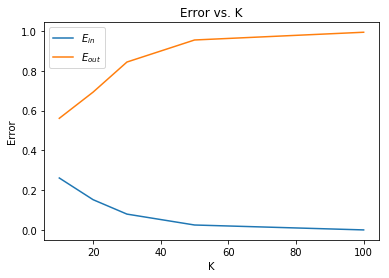

In [113]:
# Solution set for CS 155 Set 6, 2016/2017
# Authors: Fabian Boemer, Sid Murching, Suraj Nair

import numpy as np
import matplotlib.pyplot as plt
import random

Y_train = np.loadtxt('train.txt').astype(int)
Y_test = np.loadtxt('test.txt').astype(int)

M = max(max(Y_train[:,0]), max(Y_test[:,0])).astype(int) # users
N = max(max(Y_train[:,1]), max(Y_test[:,1])).astype(int) # movies
print("Factorizing with ", M, " users, ", N, " movies.")
Ks = [10,20,30,50,100]

reg = 0.0
eta = 0.03 # learning rate
E_in = []
E_out = []

# Use to compute Ein and Eout
for K in Ks:
    U, V, err = train_model(M, N, K, eta, reg, Y_train)
    E_in.append(err)
    E_out.append(get_err(U, V, Y_test, reg))

plt.figure()
plt.plot(Ks, E_in, label='$E_{in}$')
plt.plot(Ks, E_out, label='$E_{out}$')
plt.title('Error vs. K')
plt.xlabel('K')
plt.ylabel('Error')
plt.legend()
plt.show()

Training model with M = 943, N = 1682, k = 10, eta = 0.03, reg = 0.0001
iter
0.5728346675688266
iter
0.4405237307499865
else
iter
0.39458574669341656
else
iter
0.3698035751835525
else
iter
0.34550086321265755
else
iter
0.330821350936342
else
iter
0.31666939775621095
else
iter
0.3086488634719437
else
iter
0.3019865807460342
else
iter
0.2907259134209366
else
iter
0.2862751767800419
else
iter
0.2837470308147992
else
iter
0.2762908900795094
else
iter
0.2747552483817795
else
iter
0.2711109985131692
else
iter
0.26755544222760463
else
iter
0.2650211435102681
else
iter
0.2645214051012009
else
iter
0.26318465151269843
else
iter
0.2594650293095603
else
iter
0.2588801163995896
else
iter
0.2562407065771404
else
iter
0.2566374839068866
should break
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.0001
iter
0.536026908467373
iter
0.3941683534812658
else
iter
0.3391092218074519
else
iter
0.30215574301282017
else
iter
0.27425202026385787
else
iter
0.24998637047825484
else
iter
0.2348

0.045675243112061184
else
iter
0.042820775441320985
else
iter
0.04067402100893871
else
iter
0.03880651654642318
else
iter
0.03662006593186848
else
iter
0.0349506611072698
else
iter
0.03359663875112755
else
iter
0.0322344956889546
else
iter
0.03132094925349432
else
iter
0.02984615514529824
else
iter
0.028955274320103752
else
iter
0.028117607564681117
else
iter
0.027090863010494452
else
iter
0.0268024366027335
else
iter
0.025404152673564738
else
iter
0.025284152512278876
else
iter
0.024373869853517926
else
iter
0.02326569147023706
else
iter
0.023030719465221255
else
iter
0.022509882437561343
else
iter
0.02153253829867943
else
iter
0.021410686395780403
else
iter
0.021186340368356395
else
iter
0.020382460221871783
else
iter
0.019881880955058353
else
iter
0.01956503763044026
else
iter
0.0191879359790477
else
iter
0.018706231239272446
else
iter
0.01844481179281629
else
iter
0.017921810090998146
else
iter
0.017791433657567145
else
iter
0.017183384965563913
else
iter
0.017634724474474322
shoul

0.2827294365685827
else
iter
0.2816358890544099
else
iter
0.27723087075905667
else
iter
0.27660186163198264
else
iter
0.2721305441652732
else
iter
0.26982591728574257
else
iter
0.26752170167663947
else
iter
0.2687376087938415
should break
Training model with M = 943, N = 1682, k = 30, eta = 0.03, reg = 0.1
iter
0.519572604324475
iter
0.4118307677925396
else
iter
0.37634017544662507
else
iter
0.36008551326086324
else
iter
0.34465431163073024
else
iter
0.332200768353331
else
iter
0.32064880443935684
else
iter
0.3096145963653584
else
iter
0.2981409119540604
else
iter
0.29157978452126704
else
iter
0.2867682205859017
else
iter
0.27410937468141516
else
iter
0.2709194794998996
else
iter
0.27082505538599905
else
iter
0.2624752907986867
else
iter
0.2600827136906664
else
iter
0.2529639892250997
else
iter
0.2529338061709391
else
iter
0.24914191509980094
else
iter
0.24694172138837614
else
iter
0.2448932979847809
else
iter
0.2393053736844074
else
iter
0.2364917505267852
else
iter
0.2363882373891916

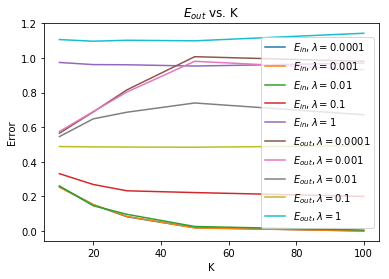

In [115]:
Y_train = np.loadtxt('train.txt').astype(int)
Y_test = np.loadtxt('test.txt').astype(int)

M = max(max(Y_train[:,0]), max(Y_test[:,0])).astype(int) # users
N = max(max(Y_train[:,1]), max(Y_test[:,1])).astype(int) # movies
Ks = [10,20,30,50,100]

regs = [10**-4, 10**-3, 10**-2, 10**-1, 1]
eta = 0.03 # learning rate
E_ins = []
E_outs = []

# Use to compute Ein and Eout
for reg in regs:
    E_ins_for_lambda = []
    E_outs_for_lambda = []
        
    for k in Ks:
        print("Training model with M = %s, N = %s, k = %s, eta = %s, reg = %s"%(M, N, k, eta, reg))
        U,V, e_in = train_model(M, N, k, eta, reg, Y_train)
        E_ins_for_lambda.append(e_in)
        eout = get_err(U, V, Y_test, reg)
        E_outs_for_lambda.append(eout)
  
    E_ins.append(E_ins_for_lambda)
    E_outs.append(E_outs_for_lambda)

# Plot
plt.figure()
for i in range(len(regs)):
    plt.plot(Ks, E_ins[i], label='$E_{in}, \lambda=$'+str(regs[i]))

for i in range(len(regs)):
    plt.plot(Ks, E_outs[i], label='$E_{out}, \lambda=$'+str(regs[i]))
plt.title('$E_{out}$ vs. K')
plt.xlabel('K')
plt.ylabel('Error')
plt.legend()
plt.show()